In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers,layers
import matplotlib.pyplot as plt



In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
x_datagen = ImageDataGenerator(
    rescale=1./255,

    rotation_range=30,

    width_shift_range=0.2,

    height_shift_range=0.2,

    shear_range=0.2,

    zoom_range=0.2,

    horizontal_flip=True,

    fill_mode='nearest'
)
x_datagen.fit(x_train)
x_datagen.fit(x_test)

In [15]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),
                  kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
    layers.Dropout(0.3),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
    layers.Dropout(0.4),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
    layers.Dropout(0.5),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(1024, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
    layers.Dense(10)
])

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
epochs_size = 30
batch_size = 128
history = model.fit(x_train,y_train, validation_data=(x_val, y_val), epochs=epochs_size,batch_size=batch_size,callbacks=[early_stopping])

Epoch 1/30
313/313 [==============================] - 5s 9ms/step - loss: 3.6978 - accuracy: 0.2699 - val_loss: 2.8218 - val_accuracy: 0.3945
Epoch 2/30
313/313 [==============================] - 2s 8ms/step - loss: 2.4898 - accuracy: 0.4087 - val_loss: 2.4981 - val_accuracy: 0.4881
Epoch 3/30
313/313 [==============================] - 3s 8ms/step - loss: 2.2191 - accuracy: 0.4697 - val_loss: 2.3451 - val_accuracy: 0.5151
Epoch 4/30
313/313 [==============================] - 3s 10ms/step - loss: 2.0211 - accuracy: 0.5107 - val_loss: 2.1338 - val_accuracy: 0.5637
Epoch 5/30
313/313 [==============================] - 3s 9ms/step - loss: 1.8713 - accuracy: 0.5439 - val_loss: 1.9972 - val_accuracy: 0.6049
Epoch 6/30
313/313 [==============================] - 2s 8ms/step - loss: 1.7506 - accuracy: 0.5663 - val_loss: 1.9275 - val_accuracy: 0.6134
Epoch 7/30
313/313 [==============================] - 2s 8ms/step - loss: 1.6426 - accuracy: 0.5877 - val_loss: 1.7817 - val_accuracy: 0.6225
Epoch

Text(0.5, 1.0, 'Accuracy')

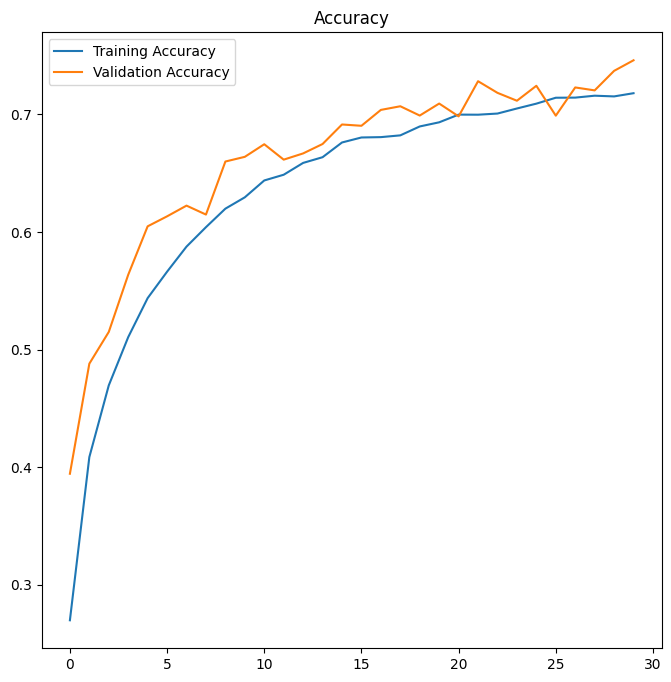

In [18]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy')

In [20]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 1.2695 - accuracy: 0.7445
Test Accuracy: 0.7445
